GEOMETRY PARAMS--------------------------------------------------
	Box Radius:  2
	Aperture Size:  1
	Number of Ants:  120
	Encounter Radius:  0.1
	Velocity:  0.1
	Collisions On.
	Start Ant 0 in Center.
	Trial Ends if Ant 0 Leaves
SIMULATION PARAMS------------------------------------------------
	Number of Events:  3820
	Total Time:  141.831
	Minimum Time Between Events:  2.99999999998e-05
ANIMATION PARAMS-------------------------------------------------
	List of Colored Ants:  [0]
	Output Every:  1
	Number of Frames:  3820
	Plot Directory:  /Users/jakehanson/Documents/Ants/plots/
	Animation Output:  /Users/jakehanson/Desktop/sim.gif
RUNNING ANIMATION------------------------------------------------
Counter 0/3820
	Time: 0.000000
	Ants in Nest: 120
Counter 1/3820
	Time: 0.021387
	Ants in Nest: 120
Counter 2/3820
	Time: 0.030679
	Ants in Nest: 120
Counter 3/3820
	Time: 0.083415
	Ants in Nest: 120
Counter 4/3820
	Time: 0.094231
	Ants in Nest: 120
Counter 5/3820
	Time: 0.105153
	Ants in Ne

KeyboardInterrupt: 

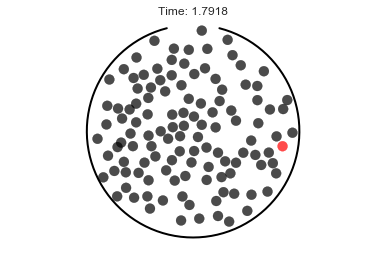

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Geometric Info
print 'GEOMETRY PARAMS--------------------------------------------------'
params = pd.read_csv('params.txt',sep='\t')
R = params.R[0]
a = params.a[0]
velo = params.velocity[0]
r_enc = params.r_enc[0]
N_ants = params.num_ants[0]
coll_flag = params.collision_flag[0]
center_flag = params.center_flag[0]
exit_flag = params.exit_flag[0]
print '\tBox Radius: ',R
print '\tAperture Size: ',a
print '\tNumber of Ants: ',N_ants
print '\tEncounter Radius: ',r_enc
print '\tVelocity: ',velo
if coll_flag == 1:
    print '\tCollisions On.'
else:
    print '\tCollisions Off.'
if center_flag == 1:
    print '\tStart Ant 0 in Center.'
else:
    print '\tStart Ant in 0 Center = False'
if exit_flag == 1:
    print '\tTrial Ends if Ant 0 Leaves'
else:
    print '\tTrial Ends if Ant 0 Leaves = False'
    
## Get Simulation Info
print 'SIMULATION PARAMS------------------------------------------------'
data = pd.read_csv('output.txt',sep='\t')
uniq_time = np.unique(data.event_time)
t_max = uniq_time[-1]
t_min = uniq_time[1]-uniq_time[0]
for i in range(np.size(uniq_time)-1):
    delta_t = uniq_time[i+1] - uniq_time[i]
    if delta_t < t_min:
        t_min = delta_t # Store the minimum time between events and use that as the resolution
N_events = data.shape[0]/N_ants
print '\tNumber of Events: ',N_events
print '\tTotal Time: ',t_max
print '\tMinimum Time Between Events: ',t_min

## Animation Parameters
print 'ANIMATION PARAMS-------------------------------------------------'
color1_ants = [0]  # list of ants to be colored with a different color
color1 = 'r'  # choose a color for unique ants
color2 = 'k'  # choose a color for unique ants
output_every = 1
N_frames = N_events/output_every
plot_dir = '/Users/jakehanson/Documents/Ants/plots/'
output_path = '/Users/jakehanson/Desktop/sim.gif'
print '\tList of Colored Ants: ',color1_ants
print '\tOutput Every: ',output_every
print '\tNumber of Frames: ',N_frames
print '\tPlot Directory: ',plot_dir
print '\tAnimation Output: ',output_path

## Generate Disk for Animation
N_points = 100
x_disk = []
y_disk = []
theta_crit = float(a)/R
for i in range(N_points+1):
    x = R*np.cos((np.pi+theta_crit)/2+(2*np.pi-theta_crit)*i/N_points)
    y = R*np.sin((np.pi+theta_crit)/2+(2*np.pi-theta_crit)*i/N_points)
    x_disk.append(x)
    y_disk.append(y)

    
## GENERATE ANIMATION
print 'RUNNING ANIMATION------------------------------------------------'
!rm $plot_dir/*
counter = 0
x_positions = []
y_positions = []
colorz = []  # array to store ant colors

for index in data.index:
    
    if data['in_nest'][index] == 1:
        if data['Name'][index] in color1_ants:
            colorz.append(color1)
        else:
            colorz.append(color2)
        x_positions.append(data.x[index])
        y_positions.append(data.y[index])

    if (index+1) % N_ants == 0:
        print 'Counter {:d}/{:d}'.format(counter,N_frames)
        print '\tTime: {:7.6f}\n\tAnts in Nest: {:d}'.format(data.event_time[index],np.size(x_positions))
        
        plt.plot(x_disk,y_disk,color='k',linestyle='-',linewidth=2)
        plt.axis('off')
        plt.title('Time: {:5.4f}'.format(data.event_time[index]))
        #plt.title('R={:2.1f}, a={:2.1f}, r_encounter={:2.1f}'.format(R,a,r_enc))
        plt.scatter(x_positions,y_positions,s=100,color=colorz,alpha=0.7)
        plt.xlim((-R-r_enc,R+r_enc))
        plt.ylim((-R-r_enc,R+r_enc))
        plt.axes().set_aspect('equal', 'datalim')
        fname = ('plot' + '_%06d.png' % (counter))  # assign filename
        plt.savefig(plot_dir+fname)
        plt.clf()
        
        # Reset arrays
        counter = counter + 1
        x_positions = []
        y_positions = []
        colorz = []

plt.close()
print 'RUNNING CONVERSION-----------------------------------------------'
!convert $plot_dir/* $output_path
print 'DONE!'